In [161]:
import pandas as pd
from utils import myutils_analysis
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_recall_fscore_support
import matplotlib.pyplot as plt

In [162]:
test_data = pd.read_csv("../data/test_int_label.csv")
train_data = pd.read_csv("../data/train_int_label.csv")
labels = pd.read_csv("../label_preds/label_pred_baseline.csv")

In [163]:
category = 1
true_labels= test_data.label_vector
train_labels = train_data.label_vector
train_text = train_data.text
pred_labels = labels.prediction
text = test_data.text

In [164]:
# myutils_analysis.show_word_clouds_confusion_matrix(true_labels,pred_labels, text, category)

In [165]:
data_cleaned = myutils_analysis.get_data_cleaned(text)

In [166]:
# myutils_analysis.show_word_clouds_confusion_matrix(true_labels,pred_labels, data_cleaned, category)

In [167]:
#myutils_analysis.show_common_words_confusion_matrix(test_data.label_category, labels.prediction,data_cleaned,20, category)

In [168]:
#myutils_analysis.show_common_bigrams_confusion_matrix(test_data.label_category, labels.prediction,data_cleaned,20,category)

In [169]:
wrongly_classified = myutils_analysis.get_wrongly_classified(true_labels,pred_labels,0,text)
wrongly_classified

{1: 3, 2: 76, 3: 127, 4: 77, 5: 81, 6: 55, 7: 199, 8: 19, 9: 4, 10: 34, 11: 60}

In [170]:
#myutils_analysis.show_word_clouds_categories(true_labels, pred_labels,data_cleaned)

In [171]:
myutils_analysis.show_common_words_categories(true_labels, pred_labels, data_cleaned)

category: 0
In total there is 27831 words in the array
[('url', 389), ('woman', 374), ('get', 304), ('like', 277), ('girl', 269), ('user', 228), ('go', 186), ('fuck', 181), ('say', 173), ('think', 166), ('want', 158), ('make', 158), ('one', 144), ('know', 141), ('would', 140), ('people', 127), ('white', 117), ('see', 117), ('time', 116), ('shit', 114)]
category: 1
In total there is 123 words in the array
[('pay', 3), ('want', 3), ('one', 3), ('face', 3), ('punch', 3), ('like', 3), ('would', 3), ('think', 2), ('as', 2), ('see', 2), ('fuck', 2), ('love', 2), ('burn', 2), ('give', 2), ('let', 2), ('beat', 2), ('proof', 2), ('go', 2), ('care', 2), ('whatever', 1)]
category: 2
In total there is 1498 words in the array
[('woman', 29), ('get', 21), ('kill', 21), ('go', 16), ('like', 15), ('shit', 14), ('shoot', 13), ('see', 11), ('way', 11), ('let', 11), ('would', 11), ('want', 10), ('need', 9), ('one', 9), ('hit', 8), ('take', 8), ('girl', 8), ('hand', 8), ('bitch', 8), ('say', 8)]
category:

In [172]:
print(classification_report(true_labels,pred_labels, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      3030
           1       0.45      0.31      0.37        16
           2       0.33      0.60      0.42        73
           3       0.33      0.51      0.40       205
           4       0.38      0.45      0.42       192
           5       0.19      0.46      0.27        57
           6       0.49      0.76      0.59       182
           7       0.18      0.49      0.27       119
           8       0.04      0.06      0.05        18
           9       0.00      0.00      0.00        14
          10       0.07      0.14      0.09        21
          11       0.22      0.27      0.24        73

    accuracy                           0.70      4000
   macro avg       0.30      0.40      0.33      4000
weighted avg       0.80      0.70      0.73      4000



In [173]:
true_labels_pretty_names = myutils_analysis.get_category_name(true_labels)
pred_labels_pretty_names = myutils_analysis.get_category_name(pred_labels)
set_true_labels = set(true_labels_pretty_names)

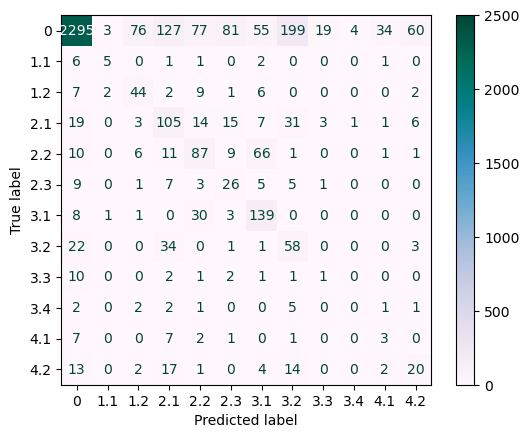

In [174]:
disp = ConfusionMatrixDisplay.from_predictions(true_labels_pretty_names, pred_labels_pretty_names, display_labels=sorted(set_true_labels),cmap='PuBuGn')
#disp.plot()
disp.ax_.get_images()[0].set_clim(0, 2500)
#plt.show()


In [175]:
pred_labels.value_counts().sort_index()

0     2408
1       11
2      135
3      315
4      226
5      139
6      286
7      315
8       24
9        5
10      43
11      93
Name: prediction, dtype: int64

In [176]:
def f1_score(true_labels, pred_labels):
    precision, recall, fbeta_score, support = precision_recall_fscore_support(true_labels, pred_labels,
                                                                             average='macro',
                                                                           zero_division=0.0)
    macro_f1 = (2 * precision * recall) / (precision + recall)
    print("macro f1: " + str(macro_f1))


In [177]:
f1_score(true_labels,pred_labels)

macro f1: 0.34532668927728877


In [178]:
true_labels_binary = myutils_analysis.set_to_one(true_labels)
pred_labels_binary = myutils_analysis.set_to_one(pred_labels)

In [179]:
true_labels_category = myutils_analysis.set_to_category(true_labels)
pred_labels_category = myutils_analysis.set_to_category(pred_labels)

In [180]:
print(classification_report(true_labels_binary, pred_labels_binary, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      3030
           1       0.54      0.88      0.67       970

    accuracy                           0.79      4000
   macro avg       0.75      0.82      0.76      4000
weighted avg       0.85      0.79      0.80      4000



In [181]:
f1_score(true_labels_binary,pred_labels_binary)

macro f1: 0.7812953173287477


In [182]:
print(classification_report(true_labels_category, pred_labels_category, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      3030
           1       0.35      0.57      0.43        89
           2       0.41      0.61      0.49       454
           3       0.33      0.62      0.43       333
           4       0.18      0.27      0.22        94

    accuracy                           0.71      4000
   macro avg       0.44      0.57      0.48      4000
weighted avg       0.81      0.71      0.75      4000



In [183]:
f1_score(true_labels_category,pred_labels_category)

macro f1: 0.49732660573390397


In [184]:
train_cleaned = myutils_analysis.get_data_cleaned(train_text)

In [185]:
#myutils_analysis.show_word_clouds_categories_true(train_labels,train_cleaned)

In [186]:
myutils_analysis.show_common_words_categories_true(train_labels,train_cleaned, 10)

category: 0
In total there is 126332 words in the array
[('woman', 2642), ('url', 1552), ('get', 1454), ('like', 1297), ('girl', 1198), ('fuck', 953), ('say', 913), ('go', 848), ('user', 810), ('want', 727)]
category: 1
In total there is 689 words in the array
[('woman', 16), ('get', 13), ('want', 11), ('like', 10), ('as', 10), ('would', 10), ('bitch', 7), ('shit', 7), ('give', 6), ('punch', 6)]
category: 2
In total there is 2824 words in the array
[('woman', 66), ('get', 32), ('bitch', 28), ('would', 24), ('fuck', 24), ('say', 22), ('need', 21), ('like', 21), ('make', 20), ('go', 19)]
category: 3
In total there is 9767 words in the array
[('woman', 612), ('men', 138), ('get', 121), ('like', 89), ('female', 87), ('fuck', 84), ('girl', 77), ('want', 72), ('know', 63), ('go', 63)]
category: 4
In total there is 8308 words in the array
[('woman', 222), ('bitch', 199), ('fuck', 117), ('whore', 108), ('get', 99), ('like', 97), ('cunt', 58), ('know', 55), ('say', 54), ('url', 49)]
category: 5

In [187]:
words_in_train = myutils_analysis.common_words(train_cleaned,170116)
words_in_train_str = list(zip(*words_in_train))[0]

In total there is 170116 words in the array
[('woman', 4384), ('get', 2033), ('like', 1800), ('url', 1760), ('girl', 1518), ('fuck', 1362), ('say', 1151), ('go', 1135), ('men', 1100), ('want', 996), ('user', 970), ('would', 966), ('think', 936), ('one', 932), ('make', 912), ('know', 902), ('female', 800), ('look', 767), ('good', 762), ('white', 733), ('shit', 690), ('man', 681), ('people', 671), ('see', 664), ('guy', 639), ('time', 639), ('even', 627), ('take', 574), ('need', 547), ('well', 526), ('give', 512), ('bitch', 506), ('right', 488), ('thing', 485), ('never', 479), ('way', 473), ('sex', 471), ('wife', 468), ('tell', 461), ('try', 453), ('hate', 412), ('call', 410), ('really', 408), ('come', 406), ('year', 405), ('much', 394), ('lol', 388), ('back', 382), ('work', 381), ('love', 378), ('rape', 372), ('use', 369), ('life', 369), ('child', 364), ('still', 362), ('kill', 354), ('old', 354), ('mean', 353), ('find', 348), ('day', 343), ('also', 342), ('trump', 337), ('let', 333), ('

In [188]:
words_in_test = myutils_analysis.common_words(data_cleaned,47804)
words_in_test_str = list(zip(*words_in_test))[0]

In total there is 47804 words in the array
[('woman', 1193), ('get', 584), ('like', 510), ('url', 474), ('girl', 455), ('fuck', 353), ('go', 304), ('user', 293), ('say', 291), ('want', 285), ('men', 272), ('would', 262), ('think', 260), ('make', 249), ('know', 245), ('one', 242), ('female', 223), ('look', 211), ('good', 204), ('guy', 204), ('see', 200), ('even', 198), ('shit', 191), ('man', 183), ('people', 181), ('white', 179), ('time', 174), ('take', 171), ('need', 162), ('bitch', 152), ('sex', 146), ('hate', 146), ('never', 144), ('right', 140), ('give', 140), ('year', 138), ('way', 136), ('try', 135), ('well', 130), ('wife', 130), ('old', 128), ('rape', 125), ('come', 120), ('talk', 119), ('tell', 116), ('thing', 116), ('work', 110), ('love', 109), ('really', 107), ('still', 107), ('lol', 106), ('black', 104), ('kill', 100), ('much', 98), ('find', 97), ('mean', 95), ('back', 94), ('let', 94), ('life', 93), ('day', 93), ('call', 92), ('could', 92), ('trump', 90), ('bad', 89), ('use'

In [189]:
words_not_in_train_str=list(set(words_in_test_str).difference(set(words_in_train_str)))

In [190]:
words_not_in_train = []
for i in range(len(words_in_test)):
    if words_in_test_str[i] in words_not_in_train_str:
        words_not_in_train.append(words_in_test[i])

In [191]:
words_not_in_train

[('squat', 5),
 ('spice', 4),
 ('hall', 4),
 ('recruit', 3),
 ('libel', 3),
 ('psych', 3),
 ('deform', 3),
 ('pumpkin', 3),
 ('hee', 3),
 ('fleshlight', 3),
 ('secondary', 3),
 ('chequer', 3),
 ('caldwell', 3),
 ('gillibrand', 3),
 ('seldom', 3),
 ('cm', 3),
 ('jv', 3),
 ('tweed', 3),
 ('voltaire', 3),
 ('motive', 3),
 ('fem', 3),
 ('barsoomian', 3),
 ('ti', 2),
 ('hungarian', 2),
 ('wypipo', 2),
 ('baboon', 2),
 ('overtake', 2),
 ('tinderthots', 2),
 ('womanly', 2),
 ('adulting', 2),
 ('impair', 2),
 ('bloo', 2),
 ('comparable', 2),
 ('remarkable', 2),
 ('evaluation', 2),
 ('hiding', 2),
 ('inkzel', 2),
 ('bailouts', 2),
 ('democrats', 2),
 ('abe', 2),
 ('qu', 2),
 ('icky', 2),
 ('prevention', 2),
 ('will', 2),
 ('precisely', 2),
 ('nutty', 2),
 ('scoff', 2),
 ('wither', 2),
 ('kno', 2),
 ('pervy', 2),
 ('victimize', 2),
 ('adjust', 2),
 ('trippin', 2),
 ('forgotten', 2),
 ('bluepill', 2),
 ('grieve', 2),
 ('sinking', 2),
 ('gvt', 2),
 ('atmosphere', 2),
 ('ke', 2),
 ('sawyer', 2),
 (